In [1]:
#必要なライブラリのインポート
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import datasets
from sklearn.model_selection import ShuffleSplit #ShuffleSplitクラスの呼び出し
from sklearn import svm, metrics #svmとmetricsを呼び出す
from sklearn.metrics import plot_confusion_matrix #混同行列の呼び出し
from sklearn.model_selection import train_test_split # train_test_splitの読み込み
from sklearn.ensemble import RandomForestClassifier #ランダムフォレストを使うためのライブラリ
from sklearn.model_selection import LeaveOneOut #交差検証(LeaveOneOut)を使うためのライブラリ
from sklearn.model_selection import cross_val_score #交差検証に必要なライブラリ
from sklearn.model_selection import learning_curve, GridSearchCV

In [2]:
#emotion_labelデータの読みこみ

data2_c_label_50 = pd.read_csv('emotion_label/session2/C/emotion_C_20201111_2_50.csv')
data2_c_label_60 = pd.read_csv('emotion_label/session2/C/emotion_C_20201111_2_60.csv')
data2_c_label_70 = pd.read_csv('emotion_label/session2/C/emotion_C_20201111_2_70.csv')
data2_c_label_80 = pd.read_csv('emotion_label/session2/C/emotion_C_20201111_2_80.csv')

# data2_a_label_50 = pd.read_csv('emotion_label/session1/B/emotion_B_20201111_2_50.csv')
# data2_a_label_60 = pd.read_csv('emotion_label/session1/B/emotion_B_20201111_2_60.csv')
# data2_a_label_70 = pd.read_csv('emotion_label/session1/B/emotion_B_20201111_2_70.csv')
# data2_a_label_80 = pd.read_csv('emotion_label/session1/B/emotion_B_20201111_2_80.csv')

#feature_data(特徴量データーセット)の読みこみ
data2_c_record_all_feature_50 = pd.read_csv('feature/C/data2_c_50_record_all_feature.csv')
data2_c_record_all_feature_60 = pd.read_csv('feature/C/data2_c_60_record_all_feature.csv')
data2_c_record_all_feature_70 = pd.read_csv('feature/C/data2_c_70_record_all_feature.csv')
data2_c_record_all_feature_80 = pd.read_csv('feature/C/data2_c_80_record_all_feature.csv')

# data2_a_record_all_feature_50 = pd.read_csv('feature/session1/B/data2_a_50_record_all_feature.csv')
# data2_a_record_all_feature_60 = pd.read_csv('feature/session1/B/data2_a_60_record_all_feature.csv')
# data2_a_record_all_feature_70 = pd.read_csv('feature/session1/B/data2_a_70_record_all_feature.csv')
# data2_a_record_all_feature_80 = pd.read_csv('feature/session1/B/data2_a_80_record_all_feature.csv')

# feature_emg = pd.read_csv("feature_emg.csv")

#確認
display(data2_c_record_all_feature_50)
display(data2_c_label_50)

,start_time,finish_time,gyrx_mean,gyry_mean,gyrz_mean,gyrn_mean,gyrx_var,gyry_var,gyrz_var,gyrn_var,gyrx_max,gyry_max,gyrz_max,gyrn_max,gyrx_min,gyry_min,gyrz_min,gyrn_min,gyrn_max_fq,gyrn_max_peak
0,2020-11-11 15:15:24,2020-11-11 15:15:28,94.003,78.505,-126.450,740.733907,46726.810991,6.955861e+05,27883.575500,2.524989e+05,870,3165,381,3193.702867,-581,-2944,-618,12.449900,1.956947,188.290269
1,2020-11-11 15:15:25,2020-11-11 15:15:29,83.035,94.897,-155.670,795.291419,48949.915775,8.226027e+05,32368.945100,3.115665e+05,870,3165,381,3193.702867,-581,-2944,-637,12.449900,0.391389,168.164193
2,2020-11-11 15:15:26,2020-11-11 15:15:30,91.909,86.690,-108.409,839.410801,81297.120719,8.777112e+05,45601.263719,3.277140e+05,1034,3165,637,3193.702867,-678,-2944,-637,12.449900,3.131115,207.500972
3,2020-11-11 15:15:27,2020-11-11 15:15:31,93.419,74.898,-143.468,1059.124445,122370.671439,1.797995e+06,64680.262976,8.982210e+05,1382,4817,698,8287.917229,-1532,-8194,-1033,51.254268,3.131115,262.200270
4,2020-11-11 15:15:28,2020-11-11 15:15:32,78.066,33.394,-116.523,982.307334,115358.407644,1.661667e+06,63788.729471,8.966739e+05,1382,4817,698,8287.917229,-1532,-8194,-1033,57.288742,0.782779,280.568331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,2020-11-11 15:29:48,2020-11-11 15:29:52,85.194,-144.980,-110.587,1626.430191,443698.918364,6.127942e+06,56716.968431,4.023590e+06,3479,11031,570,22488.584549,-1995,-22389,-1070,26.324893,0.391389,867.250344
724,2020-11-11 15:29:49,2020-11-11 15:29:53,78.797,-220.082,-87.766,1780.896626,498168.599791,6.508455e+06,66910.313244,3.964289e+06,3479,11031,722,22488.584549,-1995,-22389,-1070,71.721684,1.956947,1293.162325
725,2020-11-11 15:29:50,2020-11-11 15:29:54,33.529,-76.352,-86.743,1863.676895,552703.057159,6.603601e+06,88690.566951,3.786181e+06,3479,11031,1045,22488.584549,-2367,-22389,-1070,127.291005,1.565558,934.473139
726,2020-11-11 15:29:51,2020-11-11 15:29:55,82.658,107.140,-85.427,2184.377955,625788.009036,1.005215e+07,106147.602671,6.038187e+06,2589,12555,1045,25284.214740,-2367,-25255,-1576,111.000000,1.565558,534.814149


,start_time,finish_time,emotion_level
0,3:40,3:44,2
1,3:41,3:45,2
2,3:42,3:46,2
3,3:43,3:47,2
4,3:44,3:48,2
...,...,...,...
723,18:04,18:08,1
724,18:05,18:09,1
725,18:06,18:10,1
726,18:07,18:11,1


In [3]:
#欠損値削除
def dropna(label):
    a = label.dropna(how='all', axis=1)
    return a

data2_c_label_50 = dropna(data2_c_label_50)
data2_c_label_60 = dropna(data2_c_label_60)
data2_c_label_70 = dropna(data2_c_label_70)
data2_c_label_80 = dropna(data2_c_label_80)

# data2_a_label_50 = dropna(data2_a_label_50)
# data2_a_label_60 = dropna(data2_a_label_60)
# data2_a_label_70 = dropna(data2_c_label_70)
# data2_a_label_80 = dropna(data2_d_label_80)

In [4]:
#欠損値削除
def dropna(label):
    a = label.dropna(how='all', axis=0)
    return a

data2_c_label_50 = dropna(data2_c_label_50)
data2_c_label_60 = dropna(data2_c_label_60)
data2_c_label_70 = dropna(data2_c_label_70)
data2_c_label_80 = dropna(data2_c_label_80)

# data2_a_label_50 = dropna(data2_a_label_50)
# data2_a_label_60 = dropna(data2_a_label_60)
# data2_a_label_70 = dropna(data2_c_label_70)
# data2_a_label_80 = dropna(data2_d_label_80)

In [5]:
#emotion_labelデータからtimeHMSとsubject列を消去

data2_c_label_50 = data2_c_label_50.drop(["start_time", "finish_time"], axis=1)
data2_c_label_60 = data2_c_label_60.drop(["start_time", "finish_time"], axis=1)
data2_c_label_70 = data2_c_label_70.drop(["start_time", "finish_time"], axis=1)
data2_c_label_80 = data2_c_label_80.drop(["start_time", "finish_time"], axis=1)

# data2_a_label_50 = data2_a_label_50.drop(["start_time", "finish_time"], axis=1)
# data2_a_label_60 = data2_a_label_60.drop(["start_time", "finish_time"], axis=1)
# data2_a_label_70 = data2_a_label_70.drop(["start_time", "finish_time"], axis=1)
# data2_a_label_80 = data2_a_label_80.drop(["start_time", "finish_time"], axis=1)

#確認
data2_c_label_50

,emotion_level
0,2
1,2
2,2
3,2
4,2
...,...
723,1
724,1
725,1
726,1


In [6]:
#feature_dataとemotion_labelデータを連結
data2_c_record_all_feature_50 = pd.concat([data2_c_record_all_feature_50, data2_c_label_50], axis=1, ignore_index=False)
data2_c_record_all_feature_60 = pd.concat([data2_c_record_all_feature_60, data2_c_label_60], axis=1, ignore_index=False)
data2_c_record_all_feature_70 = pd.concat([data2_c_record_all_feature_70, data2_c_label_70], axis=1, ignore_index=False)
data2_c_record_all_feature_80 = pd.concat([data2_c_record_all_feature_80, data2_c_label_80], axis=1, ignore_index=False)

# data2_a_record_all_feature_50 = pd.concat([data2_a_record_all_feature_50, data2_a_label_50], axis=1, ignore_index=False)
# data2_a_record_all_feature_60 = pd.concat([data2_a_record_all_feature_60, data2_a_label_60], axis=1, ignore_index=False)
# data2_a_record_all_feature_70 = pd.concat([data2_a_record_all_feature_70, data2_a_label_70], axis=1, ignore_index=False)
# data2_a_record_all_feature_80 = pd.concat([data2_a_record_all_feature_80, data2_a_label_80], axis=1, ignore_index=False)

#データの確認(確認のためセッション1のBさんのデータを表示している)
display(data2_c_record_all_feature_50)

,start_time,finish_time,gyrx_mean,gyry_mean,gyrz_mean,gyrn_mean,gyrx_var,gyry_var,gyrz_var,gyrn_var,...,gyry_max,gyrz_max,gyrn_max,gyrx_min,gyry_min,gyrz_min,gyrn_min,gyrn_max_fq,gyrn_max_peak,emotion_level
0,2020-11-11 15:15:24,2020-11-11 15:15:28,94.003,78.505,-126.450,740.733907,46726.810991,6.955861e+05,27883.575500,2.524989e+05,...,3165,381,3193.702867,-581,-2944,-618,12.449900,1.956947,188.290269,2
1,2020-11-11 15:15:25,2020-11-11 15:15:29,83.035,94.897,-155.670,795.291419,48949.915775,8.226027e+05,32368.945100,3.115665e+05,...,3165,381,3193.702867,-581,-2944,-637,12.449900,0.391389,168.164193,2
2,2020-11-11 15:15:26,2020-11-11 15:15:30,91.909,86.690,-108.409,839.410801,81297.120719,8.777112e+05,45601.263719,3.277140e+05,...,3165,637,3193.702867,-678,-2944,-637,12.449900,3.131115,207.500972,2
3,2020-11-11 15:15:27,2020-11-11 15:15:31,93.419,74.898,-143.468,1059.124445,122370.671439,1.797995e+06,64680.262976,8.982210e+05,...,4817,698,8287.917229,-1532,-8194,-1033,51.254268,3.131115,262.200270,2
4,2020-11-11 15:15:28,2020-11-11 15:15:32,78.066,33.394,-116.523,982.307334,115358.407644,1.661667e+06,63788.729471,8.966739e+05,...,4817,698,8287.917229,-1532,-8194,-1033,57.288742,0.782779,280.568331,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,2020-11-11 15:29:48,2020-11-11 15:29:52,85.194,-144.980,-110.587,1626.430191,443698.918364,6.127942e+06,56716.968431,4.023590e+06,...,11031,570,22488.584549,-1995,-22389,-1070,26.324893,0.391389,867.250344,1
724,2020-11-11 15:29:49,2020-11-11 15:29:53,78.797,-220.082,-87.766,1780.896626,498168.599791,6.508455e+06,66910.313244,3.964289e+06,...,11031,722,22488.584549,-1995,-22389,-1070,71.721684,1.956947,1293.162325,1
725,2020-11-11 15:29:50,2020-11-11 15:29:54,33.529,-76.352,-86.743,1863.676895,552703.057159,6.603601e+06,88690.566951,3.786181e+06,...,11031,1045,22488.584549,-2367,-22389,-1070,127.291005,1.565558,934.473139,1
726,2020-11-11 15:29:51,2020-11-11 15:29:55,82.658,107.140,-85.427,2184.377955,625788.009036,1.005215e+07,106147.602671,6.038187e+06,...,12555,1045,25284.214740,-2367,-25255,-1576,111.000000,1.565558,534.814149,1


In [7]:
data2_c_record_all_feature_60

,start_time,finish_time,gyrx_mean,gyry_mean,gyrz_mean,gyrn_mean,gyrx_var,gyry_var,gyrz_var,gyrn_var,...,gyry_max,gyrz_max,gyrn_max,gyrx_min,gyry_min,gyrz_min,gyrn_min,gyrn_max_fq,gyrn_max_peak,emotion_level
0,2020-11-11 15:15:24,2020-11-11 15:15:28,94.003,78.505,-126.450,740.733907,46726.810991,6.955861e+05,27883.575500,2.524989e+05,...,3165,381,3193.702867,-581,-2944,-618,12.449900,1.956947,188.290269,2
1,2020-11-11 15:15:25,2020-11-11 15:15:29,83.035,94.897,-155.670,795.291419,48949.915775,8.226027e+05,32368.945100,3.115665e+05,...,3165,381,3193.702867,-581,-2944,-637,12.449900,0.391389,168.164193,2
2,2020-11-11 15:15:26,2020-11-11 15:15:30,91.909,86.690,-108.409,839.410801,81297.120719,8.777112e+05,45601.263719,3.277140e+05,...,3165,637,3193.702867,-678,-2944,-637,12.449900,3.131115,207.500972,2
3,2020-11-11 15:15:27,2020-11-11 15:15:31,93.419,74.898,-143.468,1059.124445,122370.671439,1.797995e+06,64680.262976,8.982210e+05,...,4817,698,8287.917229,-1532,-8194,-1033,51.254268,3.131115,262.200270,2
4,2020-11-11 15:15:28,2020-11-11 15:15:32,78.066,33.394,-116.523,982.307334,115358.407644,1.661667e+06,63788.729471,8.966739e+05,...,4817,698,8287.917229,-1532,-8194,-1033,57.288742,0.782779,280.568331,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,2020-11-11 15:29:48,2020-11-11 15:29:52,85.194,-144.980,-110.587,1626.430191,443698.918364,6.127942e+06,56716.968431,4.023590e+06,...,11031,570,22488.584549,-1995,-22389,-1070,26.324893,0.391389,867.250344,1
711,2020-11-11 15:29:49,2020-11-11 15:29:53,78.797,-220.082,-87.766,1780.896626,498168.599791,6.508455e+06,66910.313244,3.964289e+06,...,11031,722,22488.584549,-1995,-22389,-1070,71.721684,1.956947,1293.162325,1
712,2020-11-11 15:29:50,2020-11-11 15:29:54,33.529,-76.352,-86.743,1863.676895,552703.057159,6.603601e+06,88690.566951,3.786181e+06,...,11031,1045,22488.584549,-2367,-22389,-1070,127.291005,1.565558,934.473139,1
713,2020-11-11 15:29:51,2020-11-11 15:29:55,82.658,107.140,-85.427,2184.377955,625788.009036,1.005215e+07,106147.602671,6.038187e+06,...,12555,1045,25284.214740,-2367,-25255,-1576,111.000000,1.565558,534.814149,1


In [8]:
print(len(data2_c_record_all_feature_50))
print(len(data2_c_record_all_feature_60))
print(len(data2_c_record_all_feature_70))
print(len(data2_c_record_all_feature_80))

728
715
703
688


In [9]:
#時間でデータを切り出している
#38→上から37行目までを抜き出している
data2_c_50_record_all_feature_1 = data2_c_record_all_feature_50.iloc[0:242]
data2_c_50_record_all_feature_2 = data2_c_record_all_feature_50.iloc[242:484]
data2_c_50_record_all_feature_3 = data2_c_record_all_feature_50.iloc[484:728]

data2_c_60_record_all_feature_1 = data2_c_record_all_feature_60.iloc[0:238]
data2_c_60_record_all_feature_2 = data2_c_record_all_feature_60.iloc[238:476]
data2_c_60_record_all_feature_3 = data2_c_record_all_feature_60.iloc[476:715]

data2_c_70_record_all_feature_1 = data2_c_record_all_feature_70.iloc[0:234]
data2_c_70_record_all_feature_2 = data2_c_record_all_feature_70.iloc[234:468]
data2_c_70_record_all_feature_3 = data2_c_record_all_feature_70.iloc[468:703]

data2_c_80_record_all_feature_1 = data2_c_record_all_feature_80.iloc[0:229]
data2_c_80_record_all_feature_2 = data2_c_record_all_feature_80.iloc[229:458]
data2_c_80_record_all_feature_3 = data2_c_record_all_feature_80.iloc[458:688]


# data2_c_50_record_all_feature_1 = data2_c_record_all_feature_50.iloc[0:150]
# data2_c_50_record_all_feature_2 = data2_c_record_all_feature_50.iloc[150:300]
# data2_c_50_record_all_feature_3 = data2_c_record_all_feature_50.iloc[300:470]

# data2_c_60_record_all_feature_1 = data2_c_record_all_feature_60.iloc[0:150]
# data2_c_60_record_all_feature_2 = data2_c_record_all_feature_60.iloc[150:300]
# data2_c_60_record_all_feature_3 = data2_c_record_all_feature_60.iloc[300:470]

# data2_c_70_record_all_feature_1 = data2_c_record_all_feature_70.iloc[0:150]
# data2_c_70_record_all_feature_2 = data2_c_record_all_feature_70.iloc[150:300]
# data2_c_70_record_all_feature_3 = data2_c_record_all_feature_70.iloc[300:470]

# data2_c_80_record_all_feature_1 = data2_c_record_all_feature_80.iloc[0:150]
# data2_c_80_record_all_feature_2 = data2_c_record_all_feature_80.iloc[150:300]
# data2_c_80_record_all_feature_3 = data2_c_record_all_feature_80.iloc[300:470]

In [10]:
# data2_a_50_record_all_feature_1 = data2_a_record_all_feature_50.iloc[0:38]
# data2_a_50_record_all_feature_2 = data2_a_record_all_feature_50.iloc[38:687]
# data2_a_50_record_all_feature_3 = data2_a_record_all_feature_50.iloc[471:687]

# data2_a_60_record_all_feature_1 = data2_a_record_all_feature_60.iloc[0:38]
# data2_a_60_record_all_feature_2 = data2_a_record_all_feature_60.iloc[38:687]
# data2_a_60_record_all_feature_3 = data2_a_record_all_feature_60.iloc[471:687]

# data2_a_70_record_all_feature_1 = data2_a_record_all_feature_70.iloc[0:38]
# data2_a_70_record_all_feature_2 = data2_a_record_all_feature_70.iloc[38:687]
# data2_a_70_record_all_feature_3 = data2_a_record_all_feature_70.iloc[471:687]

# data2_a_80_record_all_feature_1 = data2_a_record_all_feature_80.iloc[0:38]
# data2_a_80_record_all_feature_2 = data2_a_record_all_feature_80.iloc[38:687]
# data2_a_80_record_all_feature_3 = data2_a_record_all_feature_80.iloc[471:687]

In [11]:
# emotion_levelの列の数値によってlabelを振り分けている
# emotion_levelの列の数値が2より大きいときはpositive
# emotion_levelの列の数値が3より小さいときはother

def emotion_level_define(data_record_all_feature):
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] > 2, "label"] = "positive"
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] <3, "label"] = "other"
    return data_record_all_feature

data2_c_50_record_all_feature_1 = emotion_level_define(data2_c_50_record_all_feature_1)
data2_c_50_record_all_feature_2 = emotion_level_define(data2_c_50_record_all_feature_2)
data2_c_50_record_all_feature_3 = emotion_level_define(data2_c_50_record_all_feature_3)

data2_c_60_record_all_feature_1 = emotion_level_define(data2_c_60_record_all_feature_1)
data2_c_60_record_all_feature_2 = emotion_level_define(data2_c_60_record_all_feature_2)
data2_c_60_record_all_feature_3 = emotion_level_define(data2_c_60_record_all_feature_3)

data2_c_70_record_all_feature_1 = emotion_level_define(data2_c_70_record_all_feature_1)
data2_c_70_record_all_feature_2 = emotion_level_define(data2_c_70_record_all_feature_2)
data2_c_70_record_all_feature_3 = emotion_level_define(data2_c_70_record_all_feature_3)

data2_c_80_record_all_feature_1 = emotion_level_define(data2_c_80_record_all_feature_1)
data2_c_80_record_all_feature_2 = emotion_level_define(data2_c_80_record_all_feature_2)
data2_c_80_record_all_feature_3 = emotion_level_define(data2_c_80_record_all_feature_3)

# data2_a_50_record_all_feature_1 = emotion_level_define(data2_a_50_record_all_feature_1)
# data2_a_50_record_all_feature_2 = emotion_level_define(data2_a_50_record_all_feature_2)
# data2_a_50_record_all_feature_3 = emotion_level_define(data2_a_50_record_all_feature_3)

# data2_a_60_record_all_feature_1 = emotion_level_define(data2_a_60_record_all_feature_1)
# data2_a_60_record_all_feature_2 = emotion_level_define(data2_a_60_record_all_feature_2)
# data2_a_60_record_all_feature_3 = emotion_level_define(data2_a_60_record_all_feature_3)

# data2_a_70_record_all_feature_1 = emotion_level_define(data2_a_70_record_all_feature_1)
# data2_a_70_record_all_feature_2 = emotion_level_define(data2_a_70_record_all_feature_2)
# data2_a_70_record_all_feature_3 = emotion_level_define(data2_a_70_record_all_feature_3)

# data2_a_80_record_all_feature_1 = emotion_level_define(data2_a_80_record_all_feature_1)
# data2_a_80_record_all_feature_2 = emotion_level_define(data2_a_80_record_all_feature_2)
# data2_a_80_record_all_feature_3 = emotion_level_define(data2_a_80_record_all_feature_3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [12]:
#特徴量データからemotion_level列を消去
def emotion_level_drop(data_record_all_feature):
    data_record_all_feature.drop(["emotion_level"], axis=1, inplace=True)
    return data_record_all_feature


data2_c_50_record_all_feature_1 = emotion_level_drop(data2_c_50_record_all_feature_1)
data2_c_50_record_all_feature_2 = emotion_level_drop(data2_c_50_record_all_feature_2)
data2_c_50_record_all_feature_3 = emotion_level_drop(data2_c_50_record_all_feature_3)

data2_c_60_record_all_feature_1 = emotion_level_drop(data2_c_60_record_all_feature_1)
data2_c_60_record_all_feature_2 = emotion_level_drop(data2_c_60_record_all_feature_2)
data2_c_60_record_all_feature_3 = emotion_level_drop(data2_c_60_record_all_feature_3)

data2_c_70_record_all_feature_1 = emotion_level_drop(data2_c_70_record_all_feature_1)
data2_c_70_record_all_feature_2 = emotion_level_drop(data2_c_70_record_all_feature_2)
data2_c_70_record_all_feature_3 = emotion_level_drop(data2_c_70_record_all_feature_3)

data2_c_80_record_all_feature_1 = emotion_level_drop(data2_c_80_record_all_feature_1)
data2_c_80_record_all_feature_2 = emotion_level_drop(data2_c_80_record_all_feature_2)
data2_c_80_record_all_feature_3 = emotion_level_drop(data2_c_80_record_all_feature_3)

# data2_a_50_record_all_feature_1 = emotion_level_drop(data2_a_50_record_all_feature_1)
# data2_a_50_record_all_feature_2 = emotion_level_drop(data2_a_50_record_all_feature_2)
# data2_a_50_record_all_feature_3 = emotion_level_drop(data2_a_50_record_all_feature_3)

# data2_a_60_record_all_feature_1 = emotion_level_drop(data2_a_60_record_all_feature_1)
# data2_a_60_record_all_feature_2 = emotion_level_drop(data2_a_60_record_all_feature_2)
# data2_a_60_record_all_feature_3 = emotion_level_drop(data2_a_60_record_all_feature_3)

# data2_a_70_record_all_feature_1 = emotion_level_drop(data2_a_70_record_all_feature_1)
# data2_a_70_record_all_feature_2 = emotion_level_drop(data2_a_70_record_all_feature_2)
# data2_a_70_record_all_feature_3 = emotion_level_drop(data2_a_70_record_all_feature_3)

# data2_a_80_record_all_feature_1 = emotion_level_drop(data2_a_80_record_all_feature_1)
# data2_a_80_record_all_feature_2 = emotion_level_drop(data2_a_80_record_all_feature_2)
# data2_a_80_record_all_feature_3 = emotion_level_drop(data2_a_80_record_all_feature_3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
data2_c_50_record_all_feature_1

,start_time,finish_time,gyrx_mean,gyry_mean,gyrz_mean,gyrn_mean,gyrx_var,gyry_var,gyrz_var,gyrn_var,...,gyry_max,gyrz_max,gyrn_max,gyrx_min,gyry_min,gyrz_min,gyrn_min,gyrn_max_fq,gyrn_max_peak,label
0,2020-11-11 15:15:24,2020-11-11 15:15:28,94.003,78.505,-126.450,740.733907,46726.810991,6.955861e+05,27883.575500,252498.936583,...,3165,381,3193.702867,-581,-2944,-618,12.449900,1.956947,188.290269,other
1,2020-11-11 15:15:25,2020-11-11 15:15:29,83.035,94.897,-155.670,795.291419,48949.915775,8.226027e+05,32368.945100,311566.540210,...,3165,381,3193.702867,-581,-2944,-637,12.449900,0.391389,168.164193,other
2,2020-11-11 15:15:26,2020-11-11 15:15:30,91.909,86.690,-108.409,839.410801,81297.120719,8.777112e+05,45601.263719,327713.997028,...,3165,637,3193.702867,-678,-2944,-637,12.449900,3.131115,207.500972,other
3,2020-11-11 15:15:27,2020-11-11 15:15:31,93.419,74.898,-143.468,1059.124445,122370.671439,1.797995e+06,64680.262976,898220.952036,...,4817,698,8287.917229,-1532,-8194,-1033,51.254268,3.131115,262.200270,other
4,2020-11-11 15:15:28,2020-11-11 15:15:32,78.066,33.394,-116.523,982.307334,115358.407644,1.661667e+06,63788.729471,896673.948888,...,4817,698,8287.917229,-1532,-8194,-1033,57.288742,0.782779,280.568331,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2020-11-11 15:19:50,2020-11-11 15:19:54,64.604,30.910,-148.491,859.971611,164846.449184,8.406061e+05,45846.547919,338926.641365,...,2927,564,3439.089705,-928,-3413,-899,46.957428,2.348337,277.205070,positive
238,2020-11-11 15:19:51,2020-11-11 15:19:55,96.248,25.423,-123.738,794.962945,168266.626496,6.724333e+05,41572.283356,275527.206682,...,2927,564,3439.089705,-1014,-3413,-728,46.957428,0.391389,266.307820,positive
239,2020-11-11 15:19:59,2020-11-11 15:20:03,107.666,206.361,-144.031,1051.832957,202001.572444,1.255501e+06,84342.258039,510414.511620,...,3610,881,3840.750578,-1111,-3828,-942,70.035705,1.956947,389.018703,other
240,2020-11-11 15:20:00,2020-11-11 15:20:04,111.798,198.776,-120.069,924.912798,160269.173196,1.060374e+06,74306.790239,505913.600368,...,3610,881,3749.132300,-1111,-3291,-942,70.035705,0.391389,413.913629,other


In [14]:
#全データからpositiveの数を確認
data2_c_50_record_all_feature_positive_1 = data2_c_50_record_all_feature_1[data2_c_50_record_all_feature_1.label == "positive"]
data2_c_50_record_all_feature_positive_1 = data2_c_50_record_all_feature_positive_1.reset_index(drop=True)
print(len(data2_c_50_record_all_feature_positive_1))

data2_c_50_record_all_feature_positive_2 = data2_c_50_record_all_feature_2[data2_c_50_record_all_feature_2.label == "positive"]
data2_c_50_record_all_feature_positive_2 = data2_c_50_record_all_feature_positive_2.reset_index(drop=True)
print(len(data2_c_50_record_all_feature_positive_2))

data2_c_50_record_all_feature_positive_3 = data2_c_50_record_all_feature_3[data2_c_50_record_all_feature_3.label == "positive"]
data2_c_50_record_all_feature_positive_3 = data2_c_50_record_all_feature_positive_3.reset_index(drop=True)
print(len(data2_c_50_record_all_feature_positive_3))

data2_c_60_record_all_feature_positive_1 = data2_c_60_record_all_feature_1[data2_c_60_record_all_feature_1.label == "positive"]
data2_c_60_record_all_feature_positive_1 = data2_c_60_record_all_feature_positive_1.reset_index(drop=True)
print(len(data2_c_60_record_all_feature_positive_1))

data2_c_60_record_all_feature_positive_2 = data2_c_60_record_all_feature_2[data2_c_60_record_all_feature_2.label == "positive"]
data2_c_60_record_all_feature_positive_2 = data2_c_60_record_all_feature_positive_2.reset_index(drop=True)
print(len(data2_c_60_record_all_feature_positive_2))

data2_c_60_record_all_feature_positive_3 = data2_c_60_record_all_feature_3[data2_c_60_record_all_feature_3.label == "positive"]
data2_c_60_record_all_feature_positive_3 = data2_c_60_record_all_feature_positive_3.reset_index(drop=True)
print(len(data2_c_60_record_all_feature_positive_3))

data2_c_70_record_all_feature_positive_1 = data2_c_70_record_all_feature_1[data2_c_70_record_all_feature_1.label == "positive"]
data2_c_670_record_all_feature_positive_1 = data2_c_70_record_all_feature_positive_1.reset_index(drop=True)
print(len(data2_c_70_record_all_feature_positive_1))

data2_c_70_record_all_feature_positive_2 = data2_c_70_record_all_feature_2[data2_c_70_record_all_feature_2.label == "positive"]
data2_c_70_record_all_feature_positive_2 = data2_c_70_record_all_feature_positive_2.reset_index(drop=True)
print(len(data2_c_70_record_all_feature_positive_2))

data2_c_70_record_all_feature_positive_3 = data2_c_70_record_all_feature_3[data2_c_70_record_all_feature_3.label == "positive"]
data2_c_70_record_all_feature_positive_3 = data2_c_70_record_all_feature_positive_3.reset_index(drop=True)
print(len(data2_c_70_record_all_feature_positive_3))

data2_c_80_record_all_feature_positive_1 = data2_c_80_record_all_feature_1[data2_c_80_record_all_feature_1.label == "positive"]
data2_c_80_record_all_feature_positive_1 = data2_c_80_record_all_feature_positive_1.reset_index(drop=True)
print(len(data2_c_80_record_all_feature_positive_1))

data2_c_80_record_all_feature_positive_2 = data2_c_80_record_all_feature_2[data2_c_80_record_all_feature_2.label == "positive"]
data2_c_80_record_all_feature_positive_2 = data2_c_80_record_all_feature_positive_2.reset_index(drop=True)
print(len(data2_c_80_record_all_feature_positive_2))

data2_c_80_record_all_feature_positive_3 = data2_c_80_record_all_feature_3[data2_c_80_record_all_feature_3.label == "positive"]
data2_c_80_record_all_feature_positive_3 = data2_c_80_record_all_feature_positive_3.reset_index(drop=True)
print(len(data2_c_80_record_all_feature_positive_3))

78
49
128
76
45
125
75
43
123
72
41
121


In [15]:
# data2_a_50_record_all_feature_positive_1 = data2_a_50_record_all_feature_1[data2_a_50_record_all_feature_1.label == "positive"]
# data2_a_50_record_all_feature_positive_1 = data2_a_50_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_positive_1))

# data2_a_50_record_all_feature_positive_2 = data2_a_50_record_all_feature_2[data2_a_50_record_all_feature_2.label == "positive"]
# data2_a_50_record_all_feature_positive_2 = data2_a_50_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_positive_2))

# data2_a_50_record_all_feature_positive_3 = data2_a_50_record_all_feature_3[data2_a_50_record_all_feature_3.label == "positive"]
# data2_a_50_record_all_feature_positive_3 = data2_a_50_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_positive_3))

# data2_a_60_record_all_feature_positive_1 = data2_a_60_record_all_feature_1[data2_a_60_record_all_feature_1.label == "positive"]
# data2_a_60_record_all_feature_positive_1 = data2_a_60_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_positive_1))

# data2_a_60_record_all_feature_positive_2 = data2_a_60_record_all_feature_2[data2_a_60_record_all_feature_2.label == "positive"]
# data2_a_60_record_all_feature_positive_2 = data2_a_60_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_positive_2))

# data2_a_60_record_all_feature_positive_3 = data2_a_60_record_all_feature_3[data2_a_60_record_all_feature_3.label == "positive"]
# data2_a_60_record_all_feature_positive_3 = data2_a_60_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_positive_3))

# data2_a_70_record_all_feature_positive_1 = data2_a_70_record_all_feature_1[data2_a_70_record_all_feature_1.label == "positive"]
# data2_a_670_record_all_feature_positive_1 = data2_a_70_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_positive_1))

# data2_a_70_record_all_feature_positive_2 = data2_a_70_record_all_feature_2[data2_a_70_record_all_feature_2.label == "positive"]
# data2_a_70_record_all_feature_positive_2 = data2_a_70_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_positive_2))

# data2_a_70_record_all_feature_positive_3 = data2_a_70_record_all_feature_3[data2_a_70_record_all_feature_3.label == "positive"]
# data2_a_70_record_all_feature_positive_3 = data2_a_70_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_positive_3))

# data2_a_80_record_all_feature_positive_1 = data2_a_80_record_all_feature_1[data2_a_80_record_all_feature_1.label == "positive"]
# data2_a_80_record_all_feature_positive_1 = data2_a_80_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_positive_1))

# data2_a_80_record_all_feature_positive_2 = data2_a_80_record_all_feature_2[data2_a_80_record_all_feature_2.label == "positive"]
# data2_a_80_record_all_feature_positive_2 = data2_a_80_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_positive_2))

# data2_a_80_record_all_feature_positive_3 = data2_a_80_record_all_feature_3[data2_a_80_record_all_feature_3.label == "positive"]
# data2_a_80_record_all_feature_positive_3 = data2_a_80_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_positive_3))

In [16]:
# #全データからotherの数を確認
data2_c_50_record_all_feature_other_1 = data2_c_50_record_all_feature_1[data2_c_50_record_all_feature_1.label == "other"]
data2_c_50_record_all_feature_other_1 = data2_c_50_record_all_feature_other_1.reset_index(drop=True)
print(len(data2_c_50_record_all_feature_other_1))

data2_c_50_record_all_feature_other_2 = data2_c_50_record_all_feature_2[data2_c_50_record_all_feature_2.label == "other"]
data2_c_50_record_all_feature_other_2 = data2_c_50_record_all_feature_other_2.reset_index(drop=True)
print(len(data2_c_50_record_all_feature_other_2))

data2_c_50_record_all_feature_other_3 = data2_c_50_record_all_feature_3[data2_c_50_record_all_feature_3.label == "other"]
data2_c_50_record_all_feature_other_3 = data2_c_50_record_all_feature_other_3.reset_index(drop=True)
print(len(data2_c_50_record_all_feature_other_3))

data2_c_60_record_all_feature_other_2 = data2_c_60_record_all_feature_2[data2_c_60_record_all_feature_2.label == "other"]
data2_c_60_record_all_feature_other_2 = data2_c_60_record_all_feature_other_2.reset_index(drop=True)
print(len(data2_c_60_record_all_feature_other_2))

data2_c_60_record_all_feature_other_3 = data2_c_60_record_all_feature_3[data2_c_60_record_all_feature_3.label == "other"]
data2_c_60_record_all_feature_other_3 = data2_c_60_record_all_feature_other_3.reset_index(drop=True)
print(len(data2_c_60_record_all_feature_other_3))

data2_c_60_record_all_feature_other_1 = data2_c_60_record_all_feature_1[data2_c_60_record_all_feature_1.label == "other"]
data2_c_60_record_all_feature_other_1 = data2_c_60_record_all_feature_other_1.reset_index(drop=True)
print(len(data2_c_60_record_all_feature_other_1))

data2_c_70_record_all_feature_other_2 = data2_c_70_record_all_feature_2[data2_c_70_record_all_feature_2.label == "other"]
data2_c_70_record_all_feature_other_2 = data2_c_70_record_all_feature_other_2.reset_index(drop=True)
print(len(data2_c_70_record_all_feature_other_2))

data2_c_70_record_all_feature_other_3 = data2_c_70_record_all_feature_3[data2_c_70_record_all_feature_3.label == "other"]
data2_c_70_record_all_feature_other_3 = data2_c_70_record_all_feature_other_3.reset_index(drop=True)
print(len(data2_c_70_record_all_feature_other_3))

data2_c_70_record_all_feature_other_1 = data2_c_70_record_all_feature_1[data2_c_70_record_all_feature_1.label == "other"]
data2_c_70_record_all_feature_other_1 = data2_c_70_record_all_feature_other_1.reset_index(drop=True)
print(len(data2_c_70_record_all_feature_other_1))

data2_c_80_record_all_feature_other_2 = data2_c_80_record_all_feature_2[data2_c_80_record_all_feature_2.label == "other"]
data2_c_80_record_all_feature_other_2 = data2_c_80_record_all_feature_other_2.reset_index(drop=True)
print(len(data2_c_80_record_all_feature_other_2))

data2_c_80_record_all_feature_other_3 = data2_c_80_record_all_feature_3[data2_c_80_record_all_feature_3.label == "other"]
data2_c_80_record_all_feature_other_3 = data2_c_80_record_all_feature_other_3.reset_index(drop=True)
print(len(data2_c_80_record_all_feature_other_3))

data2_c_80_record_all_feature_other_3 = data2_c_80_record_all_feature_3[data2_c_80_record_all_feature_3.label == "other"]
data2_c_80_record_all_feature_other_3 = data2_c_80_record_all_feature_other_3.reset_index(drop=True)
print(len(data2_c_80_record_all_feature_other_3))

164
193
116
193
114
162
191
112
159
188
109
109


In [17]:
# data2_a_50_record_all_feature_other_1 = data2_a_50_record_all_feature_1[data2_a_50_record_all_feature_1.label == "other"]
# data2_a_50_record_all_feature_other_1 = data2_a_50_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_other_1))

# data2_a_50_record_all_feature_other_2 = data2_a_50_record_all_feature_2[data2_a_50_record_all_feature_2.label == "other"]
# data2_a_50_record_all_feature_other_2 = data2_a_50_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_other_2))

# data2_a_50_record_all_feature_other_3 = data2_a_50_record_all_feature_3[data2_a_50_record_all_feature_3.label == "other"]
# data2_a_50_record_all_feature_other_3 = data2_a_50_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_other_3))

# data2_a_60_record_all_feature_other_2 = data2_a_60_record_all_feature_2[data2_a_60_record_all_feature_2.label == "other"]
# data2_a_60_record_all_feature_other_2 = data2_a_60_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_other_2))

# data2_a_60_record_all_feature_other_3 = data2_a_60_record_all_feature_3[data2_a_60_record_all_feature_3.label == "other"]
# data2_a_60_record_all_feature_other_3 = data2_a_60_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_other_3))

# data2_a_60_record_all_feature_other_1 = data2_a_60_record_all_feature_1[data2_a_60_record_all_feature_1.label == "other"]
# data2_a_60_record_all_feature_other_1 = data2_a_60_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_other_1))

# data2_a_70_record_all_feature_other_2 = data2_a_70_record_all_feature_2[data2_a_70_record_all_feature_2.label == "other"]
# data2_a_70_record_all_feature_other_2 = data2_a_70_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_other_2))

# data2_a_70_record_all_feature_other_3 = data2_a_70_record_all_feature_3[data2_a_70_record_all_feature_3.label == "other"]
# data2_a_70_record_all_feature_other_3 = data2_a_70_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_other_3))

# data2_a_70_record_all_feature_other_1 = data2_a_70_record_all_feature_1[data2_a_70_record_all_feature_1.label == "other"]
# data2_a_70_record_all_feature_other_1 = data2_a_70_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_other_1))

# data2_a_80_record_all_feature_other_2 = data2_a_80_record_all_feature_2[data2_a_80_record_all_feature_2.label == "other"]
# data2_a_80_record_all_feature_other_2 = data2_a_80_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_other_2))

# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_3[data2_a_80_record_all_feature_3.label == "other"]
# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_other_3))

# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_3[data2_a_80_record_all_feature_3.label == "other"]
# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_other_3))

In [18]:
#学習データとテストデータに分ける

train_data = pd.concat([data2_c_50_record_all_feature_1, data2_c_50_record_all_feature_2], ignore_index=True)
test_data = data2_c_50_record_all_feature_3

In [19]:
train_data

,start_time,finish_time,gyrx_mean,gyry_mean,gyrz_mean,gyrn_mean,gyrx_var,gyry_var,gyrz_var,gyrn_var,...,gyry_max,gyrz_max,gyrn_max,gyrx_min,gyry_min,gyrz_min,gyrn_min,gyrn_max_fq,gyrn_max_peak,label
0,2020-11-11 15:15:24,2020-11-11 15:15:28,94.003,78.505,-126.450,740.733907,46726.810991,6.955861e+05,27883.575500,252498.936583,...,3165,381,3193.702867,-581,-2944,-618,12.449900,1.956947,188.290269,other
1,2020-11-11 15:15:25,2020-11-11 15:15:29,83.035,94.897,-155.670,795.291419,48949.915775,8.226027e+05,32368.945100,311566.540210,...,3165,381,3193.702867,-581,-2944,-637,12.449900,0.391389,168.164193,other
2,2020-11-11 15:15:26,2020-11-11 15:15:30,91.909,86.690,-108.409,839.410801,81297.120719,8.777112e+05,45601.263719,327713.997028,...,3165,637,3193.702867,-678,-2944,-637,12.449900,3.131115,207.500972,other
3,2020-11-11 15:15:27,2020-11-11 15:15:31,93.419,74.898,-143.468,1059.124445,122370.671439,1.797995e+06,64680.262976,898220.952036,...,4817,698,8287.917229,-1532,-8194,-1033,51.254268,3.131115,262.200270,other
4,2020-11-11 15:15:28,2020-11-11 15:15:32,78.066,33.394,-116.523,982.307334,115358.407644,1.661667e+06,63788.729471,896673.948888,...,4817,698,8287.917229,-1532,-8194,-1033,57.288742,0.782779,280.568331,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,2020-11-11 15:24:44,2020-11-11 15:24:48,98.357,0.470,-127.276,601.487141,52484.473551,4.449295e+05,14675.699824,176176.422740,...,1689,246,3192.585316,-660,-3163,-643,41.533119,1.565558,307.608265,other
480,2020-11-11 15:24:45,2020-11-11 15:24:49,109.212,40.720,-148.808,621.699273,50036.211056,4.530826e+05,15692.981136,168031.037948,...,1695,192,3192.585316,-660,-3163,-643,41.533119,1.565558,238.450571,other
481,2020-11-11 15:24:46,2020-11-11 15:24:50,91.370,40.475,-124.418,643.673842,53665.853100,4.882404e+05,20923.229276,173979.963720,...,1720,301,3192.585316,-660,-3163,-643,41.533119,1.565558,188.242442,other
482,2020-11-11 15:24:47,2020-11-11 15:24:51,93.066,42.341,-121.452,644.739280,53648.627644,5.037216e+05,22610.009696,189496.136469,...,1720,301,3192.585316,-660,-3163,-643,41.533119,0.391389,286.828256,other


In [20]:
# X_train = train_data.iloc[0:,2:30]
# y_train = train_data.label

# X_test = test_data.iloc[0:,2:30]
# y_test = test_data.label

X_train = train_data.iloc[0:,2:20]
y_train = train_data.label

X_test = test_data.iloc[0:,2:20]
y_test = test_data.label

# X_train = train_data.iloc[0:,2:28]
# y_train = test_data.iloc[0:,2:28]

# X_test = train_data.label
# y_test = test_data.label

In [21]:
# random = RandomForestClassifier(random_state=42)
# loo=LeaveOneOut()

# score = cross_val_score(random, X, y, cv = 5)
# print(score.mean())
# print(score)

正答率0.45901639344262296
誤った個数：132
classification report
              precision    recall  f1-score   support

       other       0.46      0.90      0.61       116
    positive       0.40      0.06      0.11       128

    accuracy                           0.46       244
   macro avg       0.43      0.48      0.36       244
weighted avg       0.43      0.46      0.35       244

Confusion matrix, without normalization
[[104  12]
 [120   8]]


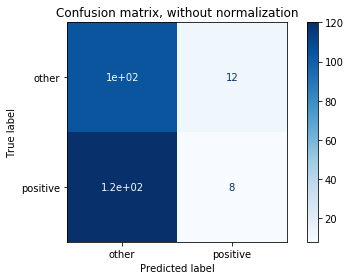

Normalized confusion matrix
[[0.89655172 0.10344828]
 [0.9375     0.0625    ]]


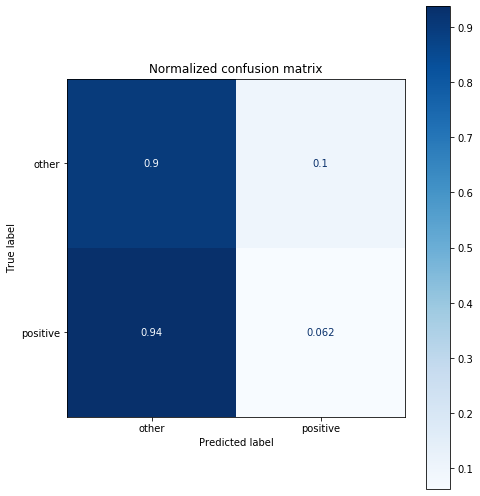

In [22]:
random = RandomForestClassifier(random_state=42)
# random = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth= 2, max_features= 10, min_samples_leaf= 3, min_samples_split= 2, n_estimators= 300)
random.fit(X_train, y_train)

level_names = ["other", "positive"]

# モデルの学習結果を評価する
accuracy = random.score(X_test, y_test)    # テストデータで試す
print(f"正答率{accuracy}")
predicted = random.predict(X_test)    # テストデータの分類結果
n_error = (y_test != predicted).sum()    # 正解と分類結果を比較する
print(f"誤った個数：{n_error}")

# 詳しいレポート
print("classification report")
print(metrics.classification_report(y_test, predicted))

#混同行列の作成
class_names = level_names
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(random, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.rcParams["figure.figsize"] = (7, 7)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    plt.tight_layout()
    plt.show()

# 特徴量選択

In [23]:
other = "0"
positive = "1"

X_train = pd.DataFrame(X_train)
X_train = X_train.reset_index(drop=True)
X_train_time = data2_c_record_all_feature_60.iloc[0:476]
X_train_time = X_train_time.iloc[0:,0:2]
X_train_time = X_train_time.reset_index(drop=True)
X_train_time = pd.concat([X_train_time, y_train], axis=1)
X_train_time.columns = ["start", "finish", "emotion_level"]
X_train_time.loc[X_train_time["emotion_level"] == "other", "label"] = 0
X_train_time.loc[X_train_time["emotion_level"] == "positive", "label"] = 1
X_train_time

y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index(drop=True)
y_test_time = data2_c_record_all_feature_60.iloc[476:715]
y_test_time = y_test_time.iloc[0:,0:2]
y_test_time = y_test_time.reset_index(drop=True)
y_test_time = pd.concat([y_test_time, y_test], axis=1)
y_test_time.columns = ["start", "finish", "emotion_level"]
y_test_time.loc[y_test_time["emotion_level"] == "other", "label"] = 0
y_test_time.loc[y_test_time["emotion_level"] == "positive", "label"] = 1
y_test_time

predicted = pd.DataFrame(predicted)
predict_time = data2_c_record_all_feature_60.iloc[476:715]
predict_time = predict_time.iloc[0:,0:2]
predict_time = predict_time.reset_index(drop=True)
predict_time = pd.concat([predict_time, predicted], axis=1)
predict_time.columns = ["start", "finish", "emotion_level"]
predict_time.loc[predict_time["emotion_level"] == "other", "label"] = 0
predict_time.loc[predict_time["emotion_level"] == "positive", "label"] = 1
predict_time

,start,finish,emotion_level,label
0,2020-11-11 15:24:48,2020-11-11 15:24:52,other,0.0
1,2020-11-11 15:24:49,2020-11-11 15:24:53,other,0.0
2,2020-11-11 15:24:58,2020-11-11 15:25:02,other,0.0
3,2020-11-11 15:24:59,2020-11-11 15:25:03,other,0.0
4,2020-11-11 15:25:00,2020-11-11 15:25:04,other,0.0
...,...,...,...,...
239,NaN,NaN,other,0.0
240,NaN,NaN,other,0.0
241,NaN,NaN,other,0.0
242,NaN,NaN,other,0.0


In [24]:
y_test_time

,start,finish,emotion_level,label
0,2020-11-11 15:24:48,2020-11-11 15:24:52,other,0.0
1,2020-11-11 15:24:49,2020-11-11 15:24:53,positive,1.0
2,2020-11-11 15:24:58,2020-11-11 15:25:02,positive,1.0
3,2020-11-11 15:24:59,2020-11-11 15:25:03,positive,1.0
4,2020-11-11 15:25:00,2020-11-11 15:25:04,positive,1.0
...,...,...,...,...
239,NaN,NaN,other,0.0
240,NaN,NaN,other,0.0
241,NaN,NaN,other,0.0
242,NaN,NaN,other,0.0


In [25]:
test = pd.concat([X_train_time, y_test_time], ignore_index=True, axis=0)
predicted = predict_time

In [26]:
test["start"] = pd.to_datetime(test['start'])
predicted["start"] = pd.to_datetime(predicted['start'])

test.set_index("start", inplace=True)
predicted.set_index("start", inplace=True)

In [27]:
test

,finish,emotion_level,label
start,,,
2020-11-11 15:15:24,2020-11-11 15:15:28,other,0.0
2020-11-11 15:15:25,2020-11-11 15:15:29,other,0.0
2020-11-11 15:15:26,2020-11-11 15:15:30,other,0.0
2020-11-11 15:15:27,2020-11-11 15:15:31,other,0.0
2020-11-11 15:15:28,2020-11-11 15:15:32,other,0.0
...,...,...,...
NaT,NaN,other,0.0
NaT,NaN,other,0.0
NaT,NaN,other,0.0


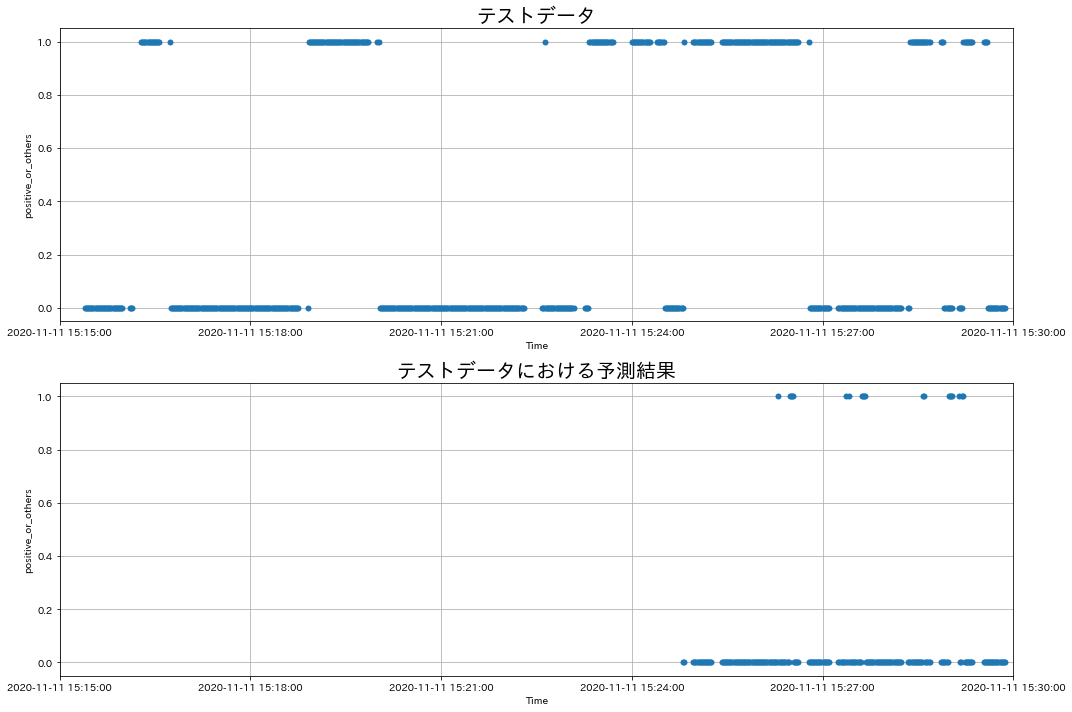

In [28]:
import datetime
import matplotlib.dates as mdates
import japanize_matplotlib

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(test.index, test["label"], marker="o", markeredgewidth=0,linewidth=0)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax1.set_xlim(datetime.datetime(2020,11,11,15,15,0), datetime.datetime(2020,11,11,15,30,0))
# ax1.set_ylim(0, 1)
ax1.xaxis.set_major_locator(mdates.MinuteLocator(range(15, 31, 3)))
ax1.set_title("テストデータ", fontsize=20)
ax1.set_xlabel("Time")
ax1.set_ylabel("positive_or_others")
ax1.grid(True)

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(predicted.index, predicted["label"], marker="o", markeredgewidth=0,linewidth=0)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax2.set_xlim(datetime.datetime(2020,11,11,15,15,0), datetime.datetime(2020,11,11,15,30,0))
ax2.xaxis.set_major_locator(mdates.MinuteLocator(range(15, 31, 3)))
ax2.set_title("テストデータにおける予測結果", fontsize=20)
ax2.set_xlabel("Time")
ax2.set_ylabel("positive_or_others")
ax2.grid(True)

plt.tight_layout()